Visualizing Tech Stocks
In this project I will analyze and visualize the top 5 highest valued technology stocks in the year of 2022:

Microsoft (MSFT)
Amazon (AMZN)
Apple (AAPL)
Alphabet (GOOG)
Meta (META)

Using Pandas, Pandas-Datarader, and Matplotlib, I will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2022. In this analysis I will perform the following:

Visualize the stock prices using matplotlib
Calculate and visualize the daily simple rate of return
Calculate and visualize the mean rates of return
Calculate and visualize the variances of the returns
Calculate and visualize the standard deviations of the returns
Write a short thesis based on the correlations between the tech stocks

1. Import Packages

Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as pd and np, respectively

Step 2: Import Financial Package
Import the pandas data reader module as web. (Ensure the module is installed with pip install pandas-datareader on the command line)

Step 3: Import Visualization Package
Import the matplotlib pyplot module as plt. (Write %matplotlib inline below the import statement to allow your visualizations to appear beneath the code that generates them)

In [2]:
import pandas as pd

import numpy as np

In [3]:
import yfinance as yf

from pandas_datareader import data as pdr

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Defining Stocks
symbols = ['MSFT', 'AMZN', 'AAPL', 'GOOG', 'META'] 

#Creating dates
start_date = '2022-01-01'
end_date = '2023-01-01'

#override the data reader function
yf.pdr_override()

#Retriving data
stock_data = pdr.get_data_yahoo(symbols, start_date, end_date)

#Viewing data

stock_data

[*********************100%***********************]  5 of 5 completed


Adj Close                                                  \
                  AAPL        AMZN        GOOG        META        MSFT   
Date                                                                     
2022-01-03  180.683868  170.404495  145.074493  338.540009  330.813812   
2022-01-04  178.390701  167.522003  144.416504  336.529999  325.141388   
2022-01-05  173.645523  164.356995  137.653503  324.170013  312.659851   
2022-01-06  170.746811  163.253998  137.550995  332.459991  310.189240   
2022-01-07  170.915573  162.554001  137.004501  331.790009  310.347382   
...                ...         ...         ...         ...         ...   
2022-12-23  131.658981   85.250000   89.809998  118.040001  238.133545   
2022-12-27  129.831772   83.040001   87.930000  116.879997  236.367981   
2022-12-28  125.847855   81.820000   86.459999  115.620003  233.944031   
2022-12-29  129.412415   84.180000   88.949997  120.260002  240.407837   
2022-12-30  129.731918   84.000000   88.730003  120.339996  239.220825   

                 Close                                                  ...  \
                  AAPL        AMZN        GOOG        META        MSFT  ...   
Date                                                                    ...   
2022-01-03  182.009995  170.404495  145.074493  338.540009  334.750000  ...   
2022-01-04  179.699997  167.522003  144.416504  336.529999  329.010010  ...   
2022-01-05  174.919998  164.356995  137.653503  324.170013  316.380005  ...   
2022-01-06  172.000000  163.253998  137.550995  332.459991  313.880005  ...   
2022-01-07  172.169998  162.554001  137.004501  331.790009  314.040009  ...   
...                ...         ...         ...         ...         ...  ...   
2022-12-23  131.860001   85.250000   89.809998  118.040001  238.729996  ...   
2022-12-27  130.029999   83.040001   87.930000  116.879997  236.960007  ...   
2022-12-28  126.040001   81.820000   86.459999  115.620003  234.529999  ...   
2022-12-29  129.610001   84.180000   88.949997  120.260002  241.009995  ...   
2022-12-30  129.929993   84.000000   88.730003  120.339996  239.820007  ...   

                  Open                                                  \
                  AAPL        AMZN        GOOG        META        MSFT   
Date                                                                     
2022-01-03  177.830002  167.550003  144.475494  338.299988  335.350006   
2022-01-04  182.630005  170.438004  145.550507  339.950012  334.829987   
2022-01-05  179.610001  166.882996  144.181000  333.019989  325.859985   
2022-01-06  172.699997  163.450500  137.497498  322.820007  313.149994   
2022-01-07  172.889999  163.839005  137.904999  332.739990  314.149994   
...                ...         ...         ...         ...         ...   
2022-12-23  130.919998   83.250000   87.620003  116.029999  236.110001   
2022-12-27  131.380005   84.970001   89.309998  117.930000  238.699997   
2022-12-28  129.669998   82.800003   87.500000  116.250000  236.889999   
2022-12-29  127.989998   82.870003   87.029999  116.400002  235.649994   
2022-12-30  128.410004   83.120003   87.364998  118.160004  238.210007   

               Volume                                          
                 AAPL      AMZN      GOOG      META      MSFT  
Date                                                           
2022-01-03  104487900  63520000  25214000  14537900  28865100  
2022-01-04   99310400  70726000  22928000  15998000  32674300  
2022-01-05   94537600  64302000  49642000  20564500  40054300  
2022-01-06   96904000  51958000  29050000  27962800  39646100  
2022-01-07   86709100  46606000  19408000  14722000  32720000  
...               ...       ...       ...       ...       ...  
2022-12-23   63814900  57433700  17815000  17796600  21207000  
2022-12-27   69007800  57284000  15470900  21392300  16688600  
2022-12-28   85438400  58228600  17879600  19612500  17457100  
2022-12-29   75703700  54995900  18280700  22366200  19770700  


2. Load the adjusted closings for the top 5 tech stocks.

Step 1: Define Stocks
Create a list named symbols containing the symbols for the top 5 tech stocks.

Step 2: Create Dates
Create a datetime object representing January 1st, 2022 named start_date and a datetime object representing January 1st, 2023 named end_date.

Step 3: Retrieve Data
Call the function web.get_data_yahoo() with arguments symbols, start_date and end_date and save the result to stock_data.

Step 4: View Data
View both stock_data and stock_data['Adj Close'].

In [5]:
stock_data['Adj Close']

,AAPL,AMZN,GOOG,META,MSFT
Date,,,,,
2022-01-03,180.683868,170.404495,145.074493,338.540009,330.813812
2022-01-04,178.390701,167.522003,144.416504,336.529999,325.141388
2022-01-05,173.645523,164.356995,137.653503,324.170013,312.659851
2022-01-06,170.746811,163.253998,137.550995,332.459991,310.189240
2022-01-07,170.915573,162.554001,137.004501,331.790009,310.347382
...,...,...,...,...,...
2022-12-23,131.658981,85.250000,89.809998,118.040001,238.133545
2022-12-27,129.831772,83.040001,87.930000,116.879997,236.367981
2022-12-28,125.847855,81.820000,86.459999,115.620003,233.944031


3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to "Date". Set the y label to "Adjusted Closing Price Over Time". Set the graph title to "Tech Stocks Adjusted Price".

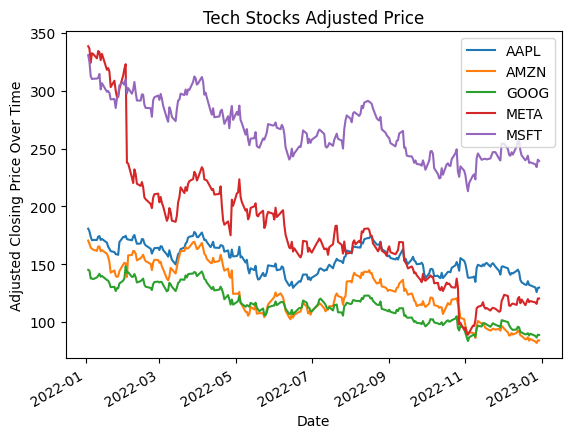

In [6]:
adj_date = stock_data["Adj Close"]
adj_date.plot()
plt.title("Tech Stocks Adjusted Price")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price Over Time")
plt.show()

4. Calculate and plot the daily simple rate of return over time.

Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately.

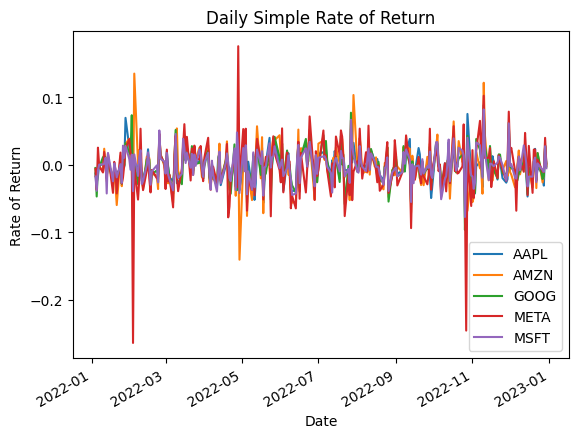

In [7]:
daily_return = adj_date.pct_change()

daily_return.plot()
plt.title("Daily Simple Rate of Return")
plt.xlabel("Date")
plt.ylabel("Rate of Return")
plt.show()

In [8]:
print(daily_return.head())

                AAPL      AMZN      GOOG      META      MSFT
Date                                                        
2022-01-03       NaN       NaN       NaN       NaN       NaN
2022-01-04 -0.012692 -0.016916 -0.004536 -0.005937 -0.017147
2022-01-05 -0.026600 -0.018893 -0.046830 -0.036728 -0.038388
2022-01-06 -0.016693 -0.006711 -0.000745  0.025573 -0.007902
2022-01-07  0.000988 -0.004288 -0.003973 -0.002015  0.000510


5. Create subplots of daily simple rate of return.

In order to better visualize the daily returns, create a subplot for each tech stock.

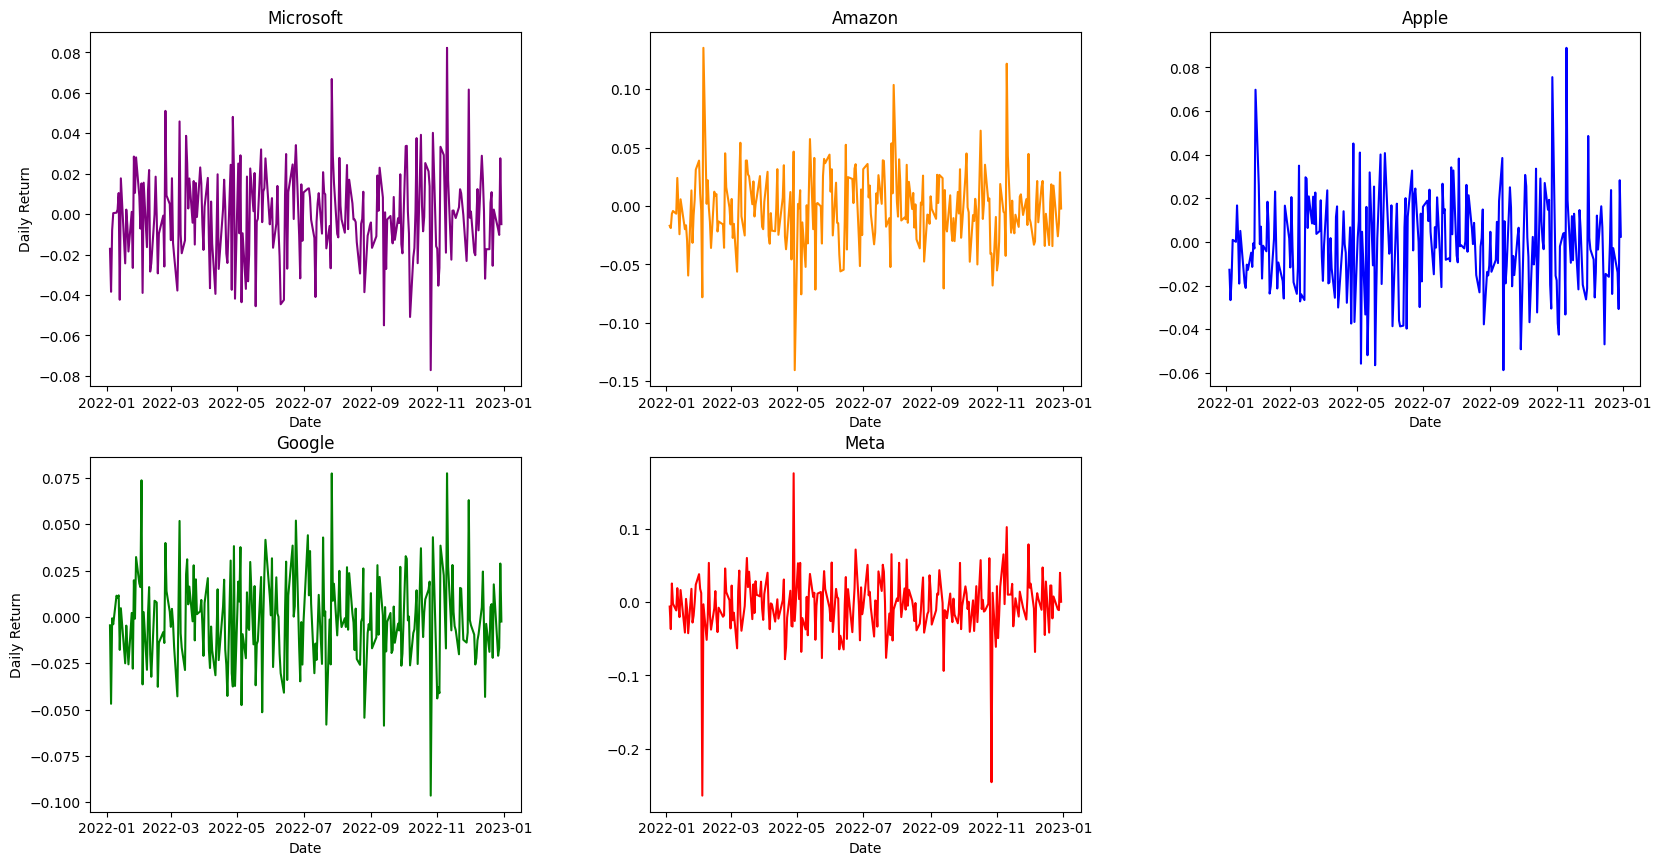

In [10]:
fig = plt.figure(figsize=(20, 10))


#Microsoft
ax1 = plt.subplot(2, 3, 1)
plt.plot(daily_return['MSFT'], color='purple')
plt.title('Microsoft')
plt.xlabel('Date')
plt.ylabel('Daily Return')

#Amazon
ax2 = plt.subplot(2, 3, 2)
plt.plot(daily_return['AMZN'], color='darkorange')
plt.title('Amazon')
plt.xlabel('Date')


#Apple
ax3 = plt.subplot(2, 3, 3)
plt.plot(daily_return['AAPL'], color='blue')
plt.title('Apple')
plt.xlabel('Date')


#Google
ax4 = plt.subplot(2, 3, 4)
plt.plot(daily_return['GOOG'], color='green')
plt.title('Google')
plt.xlabel('Date')
plt.ylabel('Daily Return')

#Facebook
ax5 = plt.subplot(2, 3, 5)
plt.plot(daily_return['META'], color='red')
plt.title('Meta')
plt.xlabel('Date')


plt.subplots_adjust(wspace=0.3, bottom=0.1)

plt.show()

6. Calculate and plot the mean of each tech stock's daily simple rate of return

Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.

Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately.

Step 3: Analyze mean rate of return

In [11]:
#Calculating the mean rate of return

mean_daily_return = daily_return.mean()
print(mean_daily_return)

AAPL   -0.001074
AMZN   -0.002329
GOOG   -0.001666
META   -0.003262
MSFT   -0.001049
dtype: float64


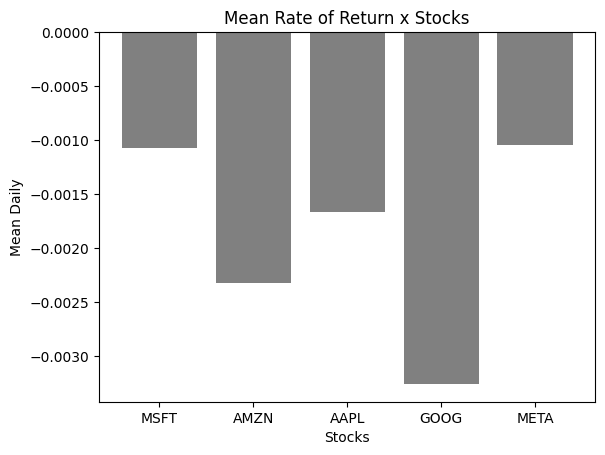

In [12]:
#Plotting bar chart

ax7 = plt.subplot()
ax7.set_xticks(range(len(symbols)))
ax7.set_xticklabels(symbols)

plt.bar(range(len(symbols)), mean_daily_return, color = 'grey')

plt.xlabel('Stocks')
plt.ylabel('Mean Daily')
plt.title('Mean Rate of Return x Stocks')

plt.show()

7. Calculate and plot the variance.

Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.

Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately.

Step 3: Analyse the variance

In [13]:
#Calculating the variance

variance_daily_return = daily_return.var()
print(variance_daily_return)

AAPL    0.000505
AMZN    0.000997
GOOG    0.000599
META    0.001645
MSFT    0.000497
dtype: float64


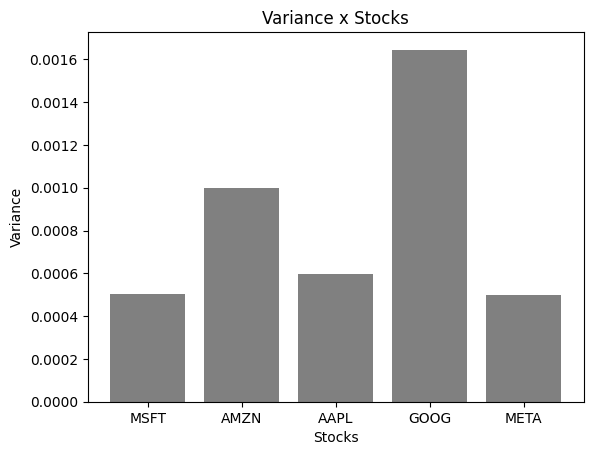

In [14]:
#Plotting bar chart
ax8 = plt.subplot()
ax8.set_xticks(range(len(symbols)))
ax8.set_xticklabels(symbols)

plt.bar(range(len(symbols)), variance_daily_return, color = 'grey')

plt.xlabel('Stocks')
plt.ylabel('Variance')
plt.title('Variance x Stocks')

plt.show()

8. Calculate and plot the standard deviation

Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately.

Step 3: Analyze the standard deviation

In [15]:
#Calculating Standard Deviation

sd_daily_return = daily_return.std()
print(sd_daily_return)

AAPL    0.022471
AMZN    0.031571
GOOG    0.024470
META    0.040555
MSFT    0.022289
dtype: float64


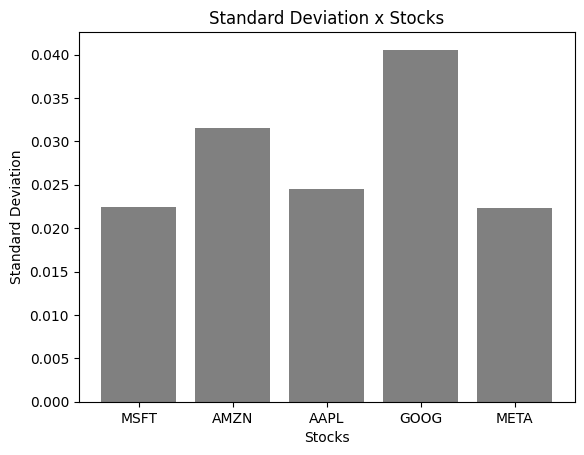

In [16]:
#Plotting bar chart
ax9 = plt.subplot()
ax9.set_xticks(range(len(symbols)))
ax9.set_xticklabels(symbols)

plt.bar(range(len(symbols)), sd_daily_return, color = 'grey')

plt.xlabel('Stocks')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation x Stocks')

plt.show()

9. Calculate the correlations

Calculate the correlations between each of the stocks.

In [17]:
#Calculating Correlation

correlation= daily_return.corr()
print(correlation)

          AAPL      AMZN      GOOG      META      MSFT
AAPL  1.000000  0.695904  0.790573  0.592901  0.824901
AMZN  0.695904  1.000000  0.724022  0.605782  0.741197
GOOG  0.790573  0.724022  1.000000  0.681990  0.845282
META  0.592901  0.605782  0.681990  1.000000  0.625860
MSFT  0.824901  0.741197  0.845282  0.625860  1.000000
